In [1]:
%run ../utils/configuration.ipynb

In [2]:
%run ./0300_common_functions.ipynb

In [3]:
df=pd.read_parquet(train_model_path) 

In [4]:
df_1 = apply_feature_selection(df, 1)
df_1.head()

,churn_value,number_of_referrals,contract,monthly_charge,age,number_of_dependents
0,0,0,1,3.699927,56,0
1,1,0,1,4.573286,53,0
2,0,0,3,2.884499,54,0
3,1,0,1,3.903963,54,0
4,0,0,3,3.385405,49,0


In [5]:
df_2 = apply_feature_selection(df, 2)
df_2.head()

,churn_value,number_of_referrals,offer,online_security,online_backup,premium_tech_support,contract,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,0,0,2,0,0,0,1,0,3.699927,12.397346,1.0,12.389729,56,0,27.725637
1,1,0,2,0,0,0,1,0,4.573286,9.197684,0.0,10.051006,53,0,38.328409
2,0,0,2,0,0,0,3,0,2.884499,10.576315,0.0,13.859843,54,0,36.599777
3,1,0,5,0,0,1,1,0,3.903963,7.464723,0.0,7.557367,54,0,10.731806
4,0,0,2,0,1,0,3,0,3.385405,8.448361,0.0,8.448361,49,0,36.851855


In [6]:
df_3 = apply_feature_selection(df, 3)
df_3.head()

,churn_value,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,avg_monthly_gb_download,online_security,online_backup,premium_tech_support,streaming_music,contract,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,0,0,2,0,0.000000,1.817121,0,0,0,1,1,1,0,3.699927,12.397346,1.0,12.389729,56,0,27.725637
1,1,0,2,1,3.095449,2.289428,0,0,0,1,1,0,0,4.573286,9.197684,0.0,10.051006,53,0,38.328409
2,0,0,2,1,3.135289,0.000000,0,0,0,0,3,1,0,2.884499,10.576315,0.0,13.859843,54,0,36.599777
3,1,0,5,1,1.308427,2.802039,0,0,1,0,1,1,0,3.903963,7.464723,0.0,7.557367,54,0,10.731806
4,0,0,2,0,0.000000,2.843867,0,1,0,1,3,1,0,3.385405,8.448361,0.0,8.448361,49,0,36.851855


In [7]:
model_NN = MLPClassifier(max_iter = 2000, random_state = 99)

In [9]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_NN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.849+/-0.0019,0.849+/-0.0054


In [10]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, model_NN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.887+/-0.0037,0.867+/-0.0024


In [11]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, model_NN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.897+/-0.0041,0.874+/-0.0068


Model Optimization

In [12]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [13]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)

    for name, model in models.items():
        train_results, val_results  = select_best_models(data, model)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, f1_score)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

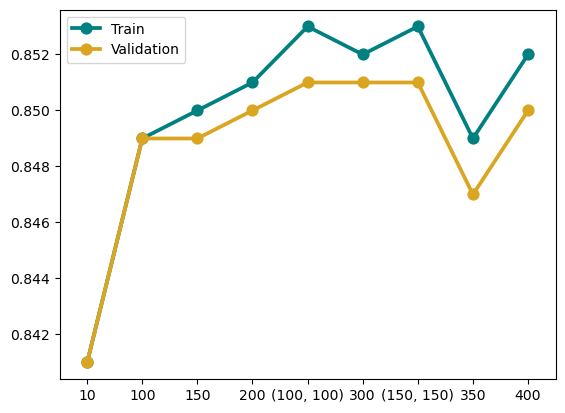

In [14]:
values_try = [(10),(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
results_train, results_val, names = get_models_nn(df_1, values_try)
point_plot(results_train, results_val, names)

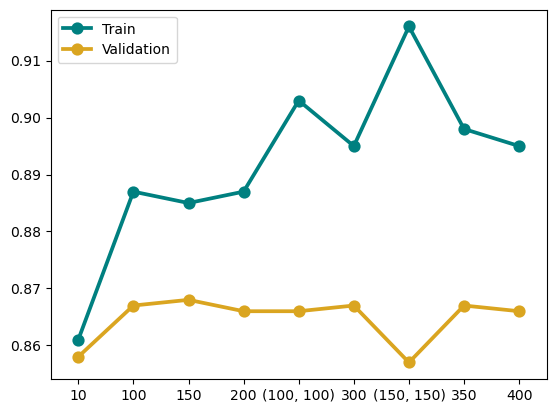

In [15]:
values_try = [(10),(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
results_train, results_val, names = get_models_nn(df_2, values_try)
point_plot(results_train, results_val, names)

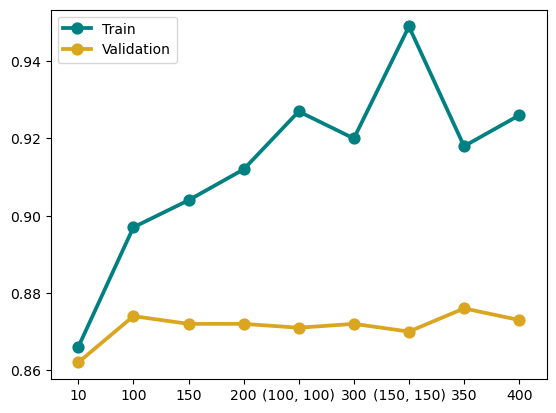

In [16]:
values_try = [(10),(100),(150),(200),(100,100),(300),(150,150),(350),(400)]
results_train, results_val, names = get_models_nn(df_3, values_try)
point_plot(results_train, results_val, names)

## Random Search

In [17]:
data = df_1.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()

scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [18]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)

parameter_space_random = {
    'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

# DO IT
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring='f1', cv=5, random_state=99)

In [19]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': 320, 'activation': 'relu'}
Best Score:  0.8440885319708757


In [7]:
final_model_nn_df1_rs = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (320),
                               learning_rate = 'invscaling',
                               learning_rate_init = 0.01,
                               solver = 'adam', max_iter = 2000, random_state = 99)

In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, final_model_nn_df1_rs))
 

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.852+/-0.0029,0.85+/-0.0073


### Perspectiva 2

In [20]:
data = df_2.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()

scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [21]:
nn = MLPClassifier(max_iter = 2000, random_state = 99)

parameter_space_random = {
    'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

# DO IT
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring='f1', cv=5, random_state=99)

In [22]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'sgd', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': 280, 'activation': 'relu'}
Best Score:  0.8562358031671989


In [8]:
final_model_nn_df2_rs = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (280),
                               learning_rate = 'constant',
                               learning_rate_init = 0.01,
                               solver = 'sgd', max_iter = 2000, random_state = 99)

In [51]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, final_model_nn_df2_rs))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.877+/-0.0037,0.863+/-0.0093


### Perspectiva 3

In [27]:
data = df_3.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()


scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [28]:
# DO IT
nn = MLPClassifier(max_iter = 2000, random_state = 99)

In [29]:
parameter_space_random = {
    'hidden_layer_sizes': [(280),(290),(300),(310),(320)],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu']
}

In [30]:
# DO IT
random_search = RandomizedSearchCV(nn, param_distributions=parameter_space_random,
                                   scoring='f1', cv=5, random_state=99)

In [31]:
random_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.0001, 'learning_rate': 'constant', 'hidden_layer_sizes': 290, 'activation': 'relu'}
Best Score:  0.8570569442139035


In [9]:
final_model_nn_df3_rs = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (290),
                               learning_rate = 'constant',
                               learning_rate_init = 0.0001,
                               solver = 'adam', max_iter = 2000, random_state = 99)

In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, final_model_nn_df3_rs))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.887+/-0.0024,0.872+/-0.0062


GridSearch

In [32]:
parameter_space_grid = {
    'hidden_layer_sizes': [(280)],
    'learning_rate_init': [0.01, 0.005, 0.015],
    'learning_rate': ['constant'],
    'solver': ['sgd','adam'],
    'activation': ['relu']
    }

### Perspectiva 2

In [33]:
data = df_2.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()

scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [34]:
# DO IT
grid_search = GridSearchCV(nn, parameter_space_grid, scoring='f1', return_train_score=True, cv=5)

In [35]:
grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': 280, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Best Score:  0.8562358031671989


In [ ]:
final_model_nn_df2_gs = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (280),
                               learning_rate = 'constant',
                               learning_rate_init = 0.01,
                               solver = 'sgd', max_iter = 2000, random_state = 99)

In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, final_model_nn_df2_gs))


------------------------------------------
f1_score
------------------------------------------


,Train,Validation
NN,0.877+/-0.0037,0.863+/-0.0093


### Perspectiva 3

In [36]:
data = df_3.copy()

X_data = data.drop(['churn_value'], axis = 1)
y_data = data['churn_value'].copy()

scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)

In [37]:
grid_search = GridSearchCV(nn, parameter_space_grid, scoring='f1', return_train_score=True, cv=5)

In [38]:
grid_search.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Hyperparameters:  {'activation': 'relu', 'hidden_layer_sizes': 280, 'learning_rate': 'constant', 'learning_rate_init': 0.005, 'solver': 'adam'}
Best Score:  0.8626026593610346


In [ ]:
final_model_nn_df3_gs = MLPClassifier(activation = 'relu',
                               hidden_layer_sizes = (280),
                               learning_rate = 'constant',
                               learning_rate_init = 0.005,
                               solver = 'adam', max_iter = 2000, random_state = 99)

In [ ]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['NN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, final_model_nn_df3_gs))


------------------------------------------
f1_score
------------------------------------------


c:\Users\Danie\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


,Train,Validation
NN,0.934+/-0.0123,0.87+/-0.0025


### Plot ROC

In [11]:
from imblearn.over_sampling import SMOTE
def showROCcurve(model, data):
    X_data = data.drop(['churn_value'], axis = 1)
    y_data = data['churn_value'].copy()

    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                    train_size = 0.8,
                                                    random_state = 99,
                                                    stratify = y_data)


    X_train = apply_scale(X_train)
    X_val = apply_scale(X_val)

    model_nn = model.fit(X_train, y_train)
    prob_modelNN =  model_nn.predict_proba(X_val)

    fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])

    plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()

### Change the threshold

In [12]:
def getThreshold(model, data):
    X_data = data.drop(['churn_value'], axis = 1)
    y_data = data['churn_value'].copy()

    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                    train_size = 0.8,
                                                    random_state = 99,
                                                    stratify = y_data)

    X_train = apply_scale(X_train)

    final_model = model.fit(X_train, y_train)

    X_val = apply_scale(X_val)

    predict_proba = final_model.predict_proba(X_val)

    precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1])

    # compute F1 score, avoid division by zero
    fscore = np.where((precision + recall) > 0, (2 * precision * recall) / (precision + recall), 0)

    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    plt.plot(recall, precision, marker='.')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

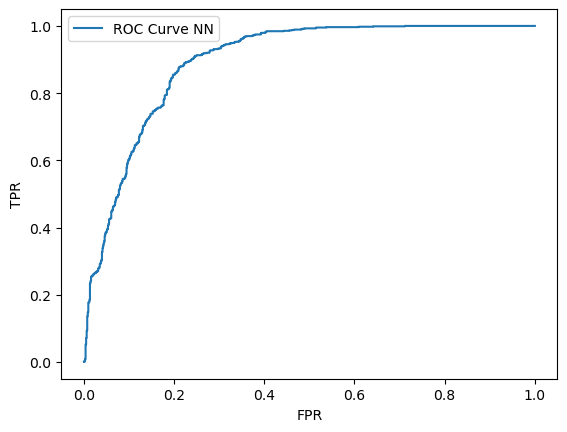

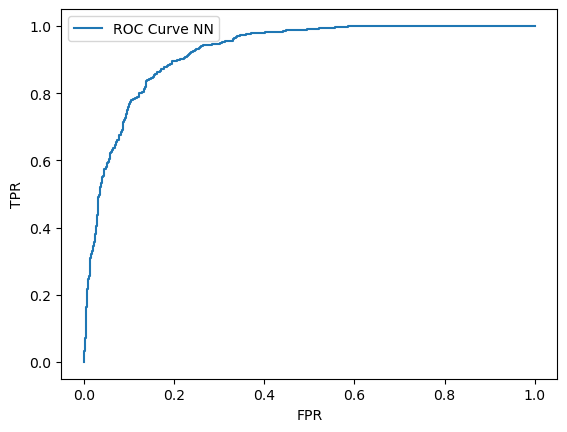

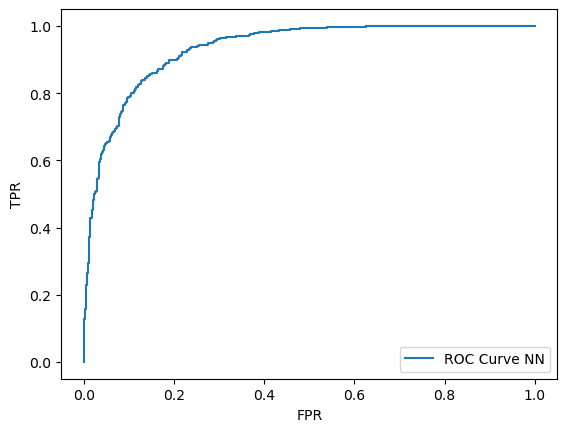

In [13]:
showROCcurve(final_model_nn_df1_rs, df_1)
showROCcurve(final_model_nn_df2_rs, df_2)
showROCcurve(final_model_nn_df3_rs, df_3)

Best Threshold=0.326077, F-Score=0.844


C:\Users\Danie\AppData\Local\Temp\ipykernel_26544\1083628355.py:21: RuntimeWarning: invalid value encountered in divide
  fscore = np.where((precision + recall) > 0, (2 * precision * recall) / (precision + recall), 0)


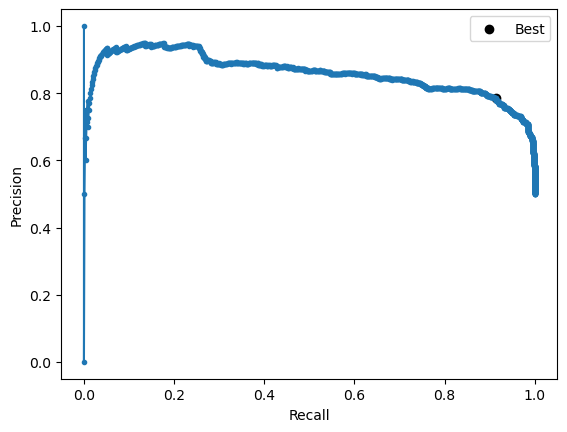

Best Threshold=0.420183, F-Score=0.856


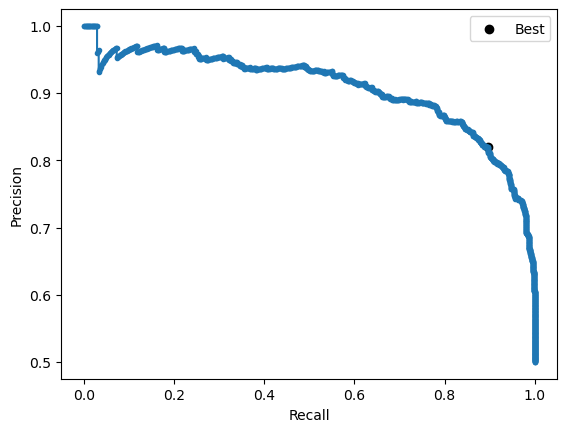

Best Threshold=0.355473, F-Score=0.862


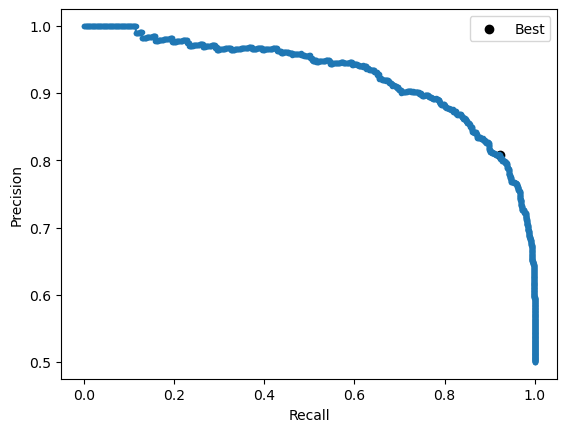

In [14]:
getThreshold(final_model_nn_df1_rs, df_1)
getThreshold(final_model_nn_df2_rs, df_2)
getThreshold(final_model_nn_df3_rs, df_3)